# Курсовой проект по дисциплине "Технологии машинного обучения"

## Студент: Кобяк Андрей Вячеславович, группа ИУ5-62Б, исследование: Типовое

Исследовать будем [набор данных](https://www.kaggle.com/primaryobjects/voicegender) о распознавании пола по голосу. Эта база данных была создана для идентификации голоса как мужского или женского на основе акустических свойств голоса и речи. Набор данных состоит из 3168 записанных образцов голоса, собранных у говорящих мужчин и женщин.

Признаки:
+ meanfreq - средняя частота (в кГц)
+ sd - стандартное отклонение частоты
+ median - средняя частота (в кГц)
+ Q25 - первый квантиль (в кГц)
+ Q75 - третий квантиль (в кГц)
+ IQR - межквантильный диапазон (в кГц)
+ skew - асимметрия
+ kurt - эксцесс
+ sp.ent - спектральная энтропия
+ sfm - спектральная плоскостность
+ mode - частота режима
+ centroid - частотный центроид 
+ peakf - пиковая частота (частота с наибольшей энергией)
+ meanfun - среднее значение основной частоты, измеренное по акустическому сигналу
+ minfun - минимальная основная частота, измеренная через акустический сигнал
+ maxfun - максимальная основная частота, измеренная через акустический сигнал
+ meandom - среднее значение доминирующей частоты, измеренное по акустическому сигналу
+ mindom - минимум доминирующей частоты, измеренной в акустическом сигнале
+ maxdom - максимум доминирующей частоты, измеренной в акустическом сигнале
+ dfrange - диапазон доминирующей частоты, измеренной в акустическом сигнале.
+ modindx - индекс модуляции. Рассчитывается как суммарная абсолютная разница между соседними измерениями основных частот, деленная на частотный диапазон.
+ label - мужчина или женщина (целевой)


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
%matplotlib inline 
sns.set(style="ticks")

In [2]:
from typing import Dict, Tuple

In [3]:
from sklearn.metrics import plot_roc_curve

In [4]:
data = pd.read_csv('data/voice.csv', sep=",")

## 1) Проведение разведочного анализа данных. Анализ, построение графиков, заполнение пропусков.

In [5]:
data.head()

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000   male  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632   male  
2  0.271186  0.007990  0.007812  0.015625  0.007812  0.046512   male  
3  0.250000  0.201497  0.007812  0.562500  0.554688  0.247119   male  
4  0.266667  0.712812  0.007812  5.484375  5.476562  0.208274   male  

[5 rows x 21 columns]

In [6]:
data.shape

(3168, 21)

In [7]:
data.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [8]:
# Проверка наличия пустых значений (цикл по колонкам)
for col in data.columns:
    NULL_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, NULL_count))

meanfreq - 0
sd - 0
median - 0
Q25 - 0
Q75 - 0
IQR - 0
skew - 0
kurt - 0
sp.ent - 0
sfm - 0
mode - 0
centroid - 0
meanfun - 0
minfun - 0
maxfun - 0
meandom - 0
mindom - 0
maxdom - 0
dfrange - 0
modindx - 0
label - 0


In [9]:
# Разделим набор на признаки и цеоевоую переменную
data_clear_x = data.drop('label', 1)
data_clear_y = data['label']

In [10]:
data.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

**Набор даных не содержит пропусков.**

### Построение графиков

In [11]:
data_clear_y.unique()

array(['male', 'female'], dtype=object)

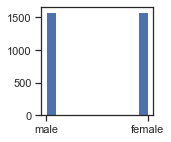

In [12]:
# Оценим дисбаланс классов для Occupancy
fig, ax = plt.subplots(figsize=(2,2)) 
plt.hist(data['label'])
plt.show()

In [13]:
# посчитаем дисбаланс классов
total = data.shape[0]
class_0, class_1 = data['label'].value_counts()
print('Класс 0 составляет {}%, а класс 1 составляет {}%.'
      .format(round(class_0 / total, 4)*100, round(class_1 / total, 4)*100))

Класс 0 составляет 50.0%, а класс 1 составляет 50.0%.


**Распределение классов целевого признака идеальное.**

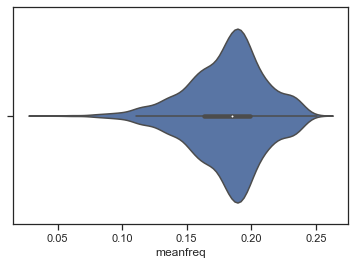

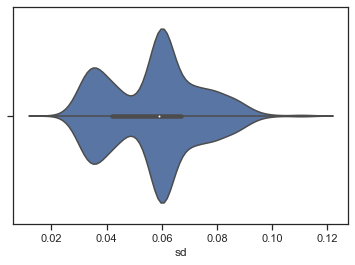

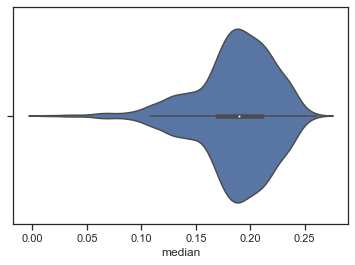

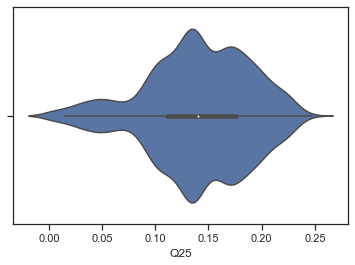

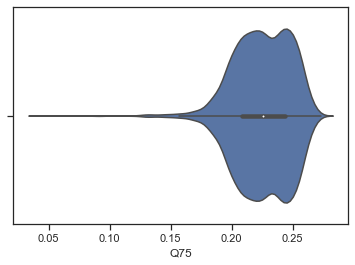

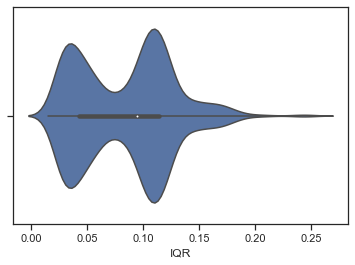

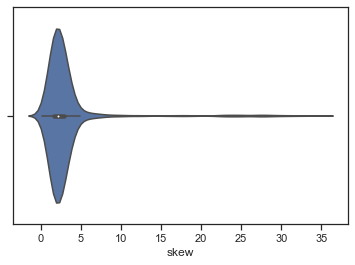

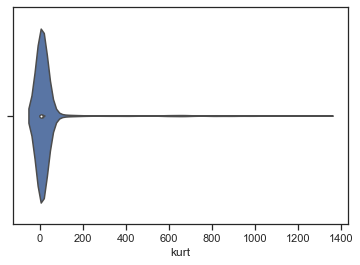

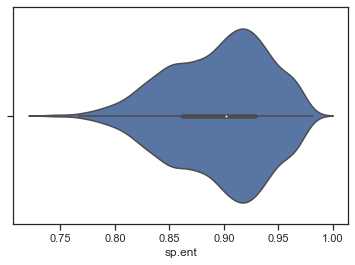

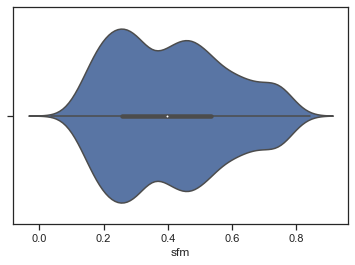

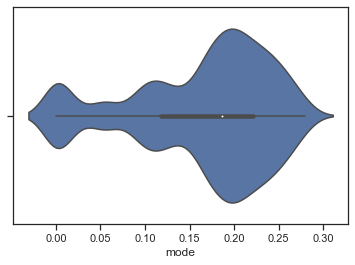

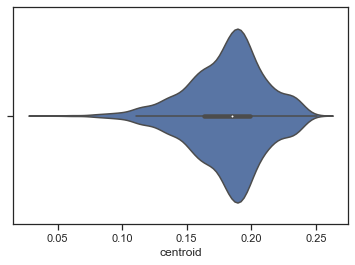

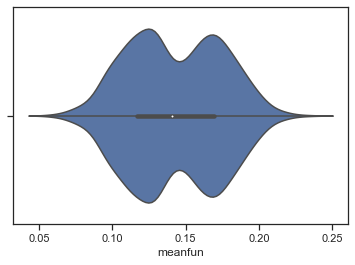

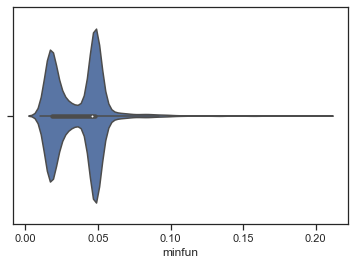

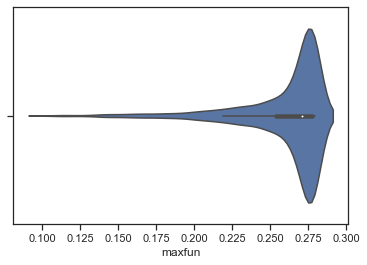

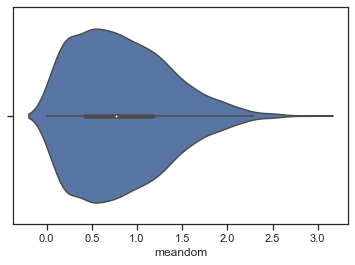

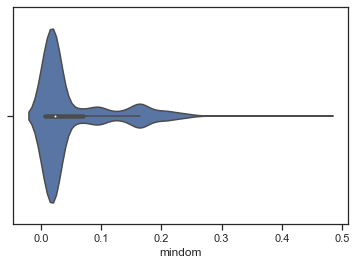

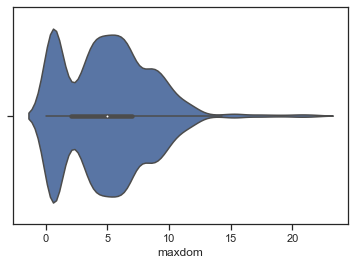

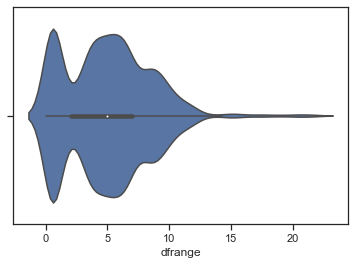

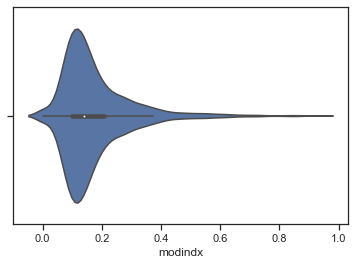

In [14]:
for col in ['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']:
    sns.violinplot(x=data_clear_x[col])
    plt.show()

## 2) Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных.

In [15]:
# Преобразуем целевой признак для задачи регрессии в признак для решения задачи классификации.
def regr_to_class(y: str) -> int:
    if y == 'male':
        result = 0
    else:
        result = 1        
    return result 

In [16]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [17]:
data_clear_y

0         male
1         male
2         male
3         male
4         male
         ...  
3163    female
3164    female
3165    female
3166    female
3167    female
Name: label, Length: 3168, dtype: object

In [18]:
le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])

In [19]:
data['label']

0       1
1       1
2       1
3       1
4       1
       ..
3163    0
3164    0
3165    0
3166    0
3167    0
Name: label, Length: 3168, dtype: int32

In [20]:
data.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [21]:
data_clear = data

In [22]:
stroka = ['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']

In [23]:
sc1 = MinMaxScaler()
data_clear[stroka] = sc1.fit_transform(data[stroka])

In [24]:
data_clear

meanfreq        sd    median       Q25       Q75       IQR      skew  \
0     0.096419  0.473409  0.084125  0.060063  0.204956  0.254828  0.367853   
1     0.125828  0.505075  0.116900  0.077635  0.215683  0.246961  0.644279   
2     0.179222  0.675536  0.102873  0.034284  0.385912  0.457148  0.885255   
3     0.528261  0.554611  0.587559  0.389906  0.715802  0.407358  0.031549   
4     0.452195  0.627209  0.454272  0.317627  0.707515  0.474474  0.027742   
...        ...       ...       ...       ...       ...       ...       ...   
3163  0.436911  0.684871  0.570361  0.198513  0.686256  0.577704  0.046854   
3164  0.362946  0.731172  0.262871  0.171937  0.702595  0.621185  0.015961   
3165  0.484949  0.799042  0.690337  0.134329  0.786967  0.742124  0.050161   
3166  0.492516  0.745692  0.695311  0.175136  0.767804  0.681107  0.041908   
3167  0.595700  0.768964  0.687590  0.282629  0.901780  0.699289  0.045203   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0     0.208279  0.635798  0.564526  ...  0.096419  0.157706  0.030501   
1     0.483766  0.630964  0.591578  ...  0.125828  0.287642  0.031140   
2     0.782275  0.442738  0.548382  ...  0.179222  0.236945  0.030264   
3     0.001613  0.923261  0.856457  ...  0.528261  0.183442  0.041287   
4     0.001732  0.958736  0.926348  ...  0.452195  0.279190  0.036829   
...        ...       ...       ...  ...       ...       ...       ...   
3163  0.003489  0.921665  0.901057  ...  0.436911  0.698762  0.380813   
3164  0.000333  0.912549  0.834545  ...  0.362946  0.732760  0.126776   
3165  0.003469  0.855587  0.765849  ...  0.484949  0.847759  0.153011   
3166  0.002539  0.870307  0.792241  ...  0.492516  0.641561  0.127158   
3167  0.002830  0.822610  0.700510  ...  0.595700  0.714235  0.270097   

        maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0     0.981526  0.000000  0.006452  0.000000  0.000000  0.000000      1  
1     0.834600  0.000407  0.006452  0.002144  0.002146  0.056449      1  
2     0.954963  0.000060  0.006452  0.000357  0.000358  0.049885      1  
3     0.834600  0.065659  0.006452  0.025375  0.025393  0.265043      1  
4     0.929285  0.238994  0.006452  0.250536  0.250715  0.223380      1  
...        ...       ...       ...       ...       ...       ...    ...  
3163  0.904450  0.279703  0.006452  0.192280  0.192418  0.173674      0  
3164  0.981526  0.305791  0.075269  0.167977  0.166667  0.298053      0  
3165  0.981526  0.164908  0.006452  0.134024  0.134120  0.208885      0  
3166  0.834600  0.265621  0.006452  0.164046  0.164163  0.333559      0  
3167  0.954963  0.074312  0.006452  0.025018  0.025036  0.375386      0  

[3168 rows x 21 columns]

In [25]:
data

meanfreq        sd    median       Q25       Q75       IQR      skew  \
0     0.096419  0.473409  0.084125  0.060063  0.204956  0.254828  0.367853   
1     0.125828  0.505075  0.116900  0.077635  0.215683  0.246961  0.644279   
2     0.179222  0.675536  0.102873  0.034284  0.385912  0.457148  0.885255   
3     0.528261  0.554611  0.587559  0.389906  0.715802  0.407358  0.031549   
4     0.452195  0.627209  0.454272  0.317627  0.707515  0.474474  0.027742   
...        ...       ...       ...       ...       ...       ...       ...   
3163  0.436911  0.684871  0.570361  0.198513  0.686256  0.577704  0.046854   
3164  0.362946  0.731172  0.262871  0.171937  0.702595  0.621185  0.015961   
3165  0.484949  0.799042  0.690337  0.134329  0.786967  0.742124  0.050161   
3166  0.492516  0.745692  0.695311  0.175136  0.767804  0.681107  0.041908   
3167  0.595700  0.768964  0.687590  0.282629  0.901780  0.699289  0.045203   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0     0.208279  0.635798  0.564526  ...  0.096419  0.157706  0.030501   
1     0.483766  0.630964  0.591578  ...  0.125828  0.287642  0.031140   
2     0.782275  0.442738  0.548382  ...  0.179222  0.236945  0.030264   
3     0.001613  0.923261  0.856457  ...  0.528261  0.183442  0.041287   
4     0.001732  0.958736  0.926348  ...  0.452195  0.279190  0.036829   
...        ...       ...       ...  ...       ...       ...       ...   
3163  0.003489  0.921665  0.901057  ...  0.436911  0.698762  0.380813   
3164  0.000333  0.912549  0.834545  ...  0.362946  0.732760  0.126776   
3165  0.003469  0.855587  0.765849  ...  0.484949  0.847759  0.153011   
3166  0.002539  0.870307  0.792241  ...  0.492516  0.641561  0.127158   
3167  0.002830  0.822610  0.700510  ...  0.595700  0.714235  0.270097   

        maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0     0.981526  0.000000  0.006452  0.000000  0.000000  0.000000      1  
1     0.834600  0.000407  0.006452  0.002144  0.002146  0.056449      1  
2     0.954963  0.000060  0.006452  0.000357  0.000358  0.049885      1  
3     0.834600  0.065659  0.006452  0.025375  0.025393  0.265043      1  
4     0.929285  0.238994  0.006452  0.250536  0.250715  0.223380      1  
...        ...       ...       ...       ...       ...       ...    ...  
3163  0.904450  0.279703  0.006452  0.192280  0.192418  0.173674      0  
3164  0.981526  0.305791  0.075269  0.167977  0.166667  0.298053      0  
3165  0.981526  0.164908  0.006452  0.134024  0.134120  0.208885      0  
3166  0.834600  0.265621  0.006452  0.164046  0.164163  0.333559      0  
3167  0.954963  0.074312  0.006452  0.025018  0.025036  0.375386      0  

[3168 rows x 21 columns]

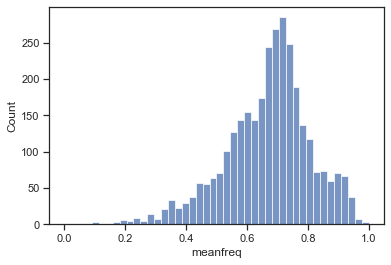

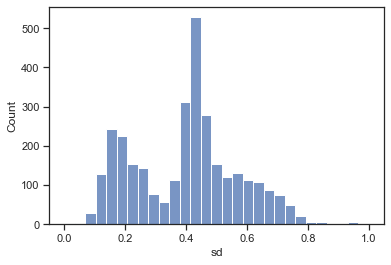

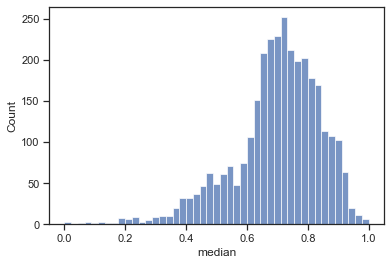

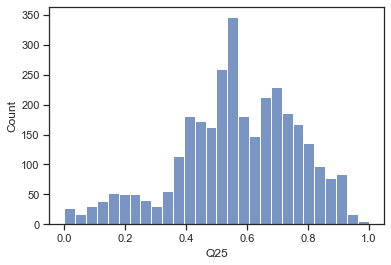

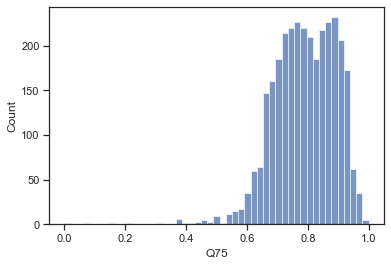

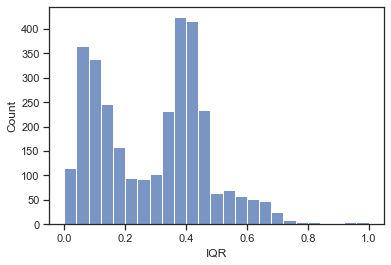

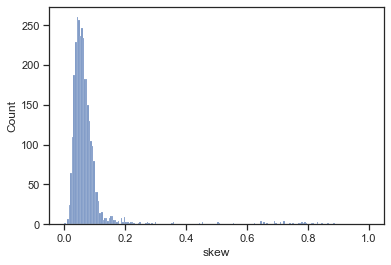

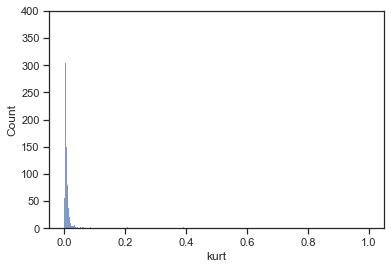

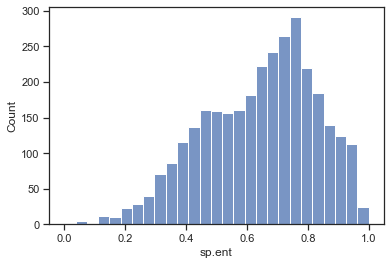

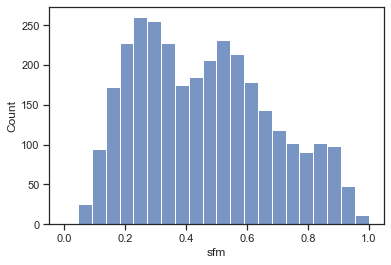

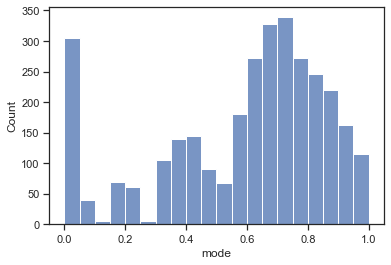

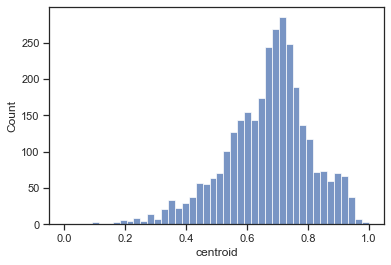

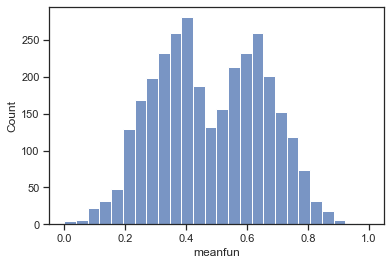

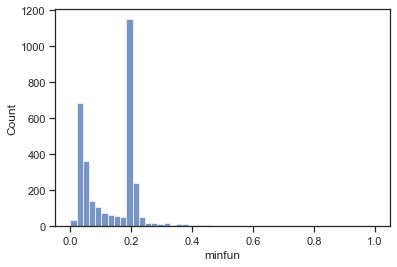

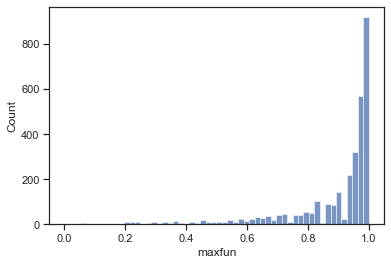

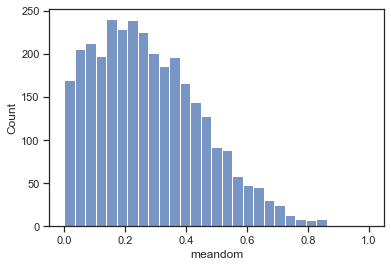

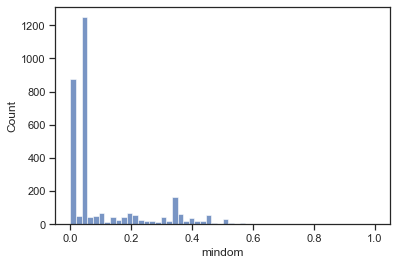

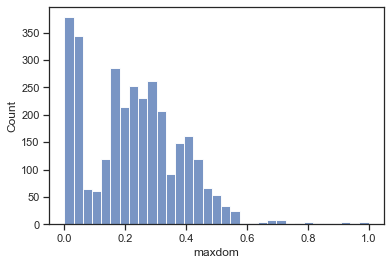

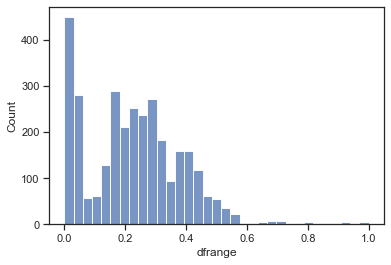

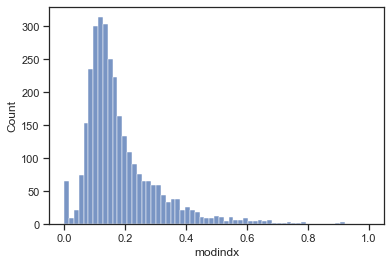

In [26]:
for col in stroka:
    sns.histplot(data_clear[col])
    plt.show()

## 3) Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения.

<AxesSubplot:>

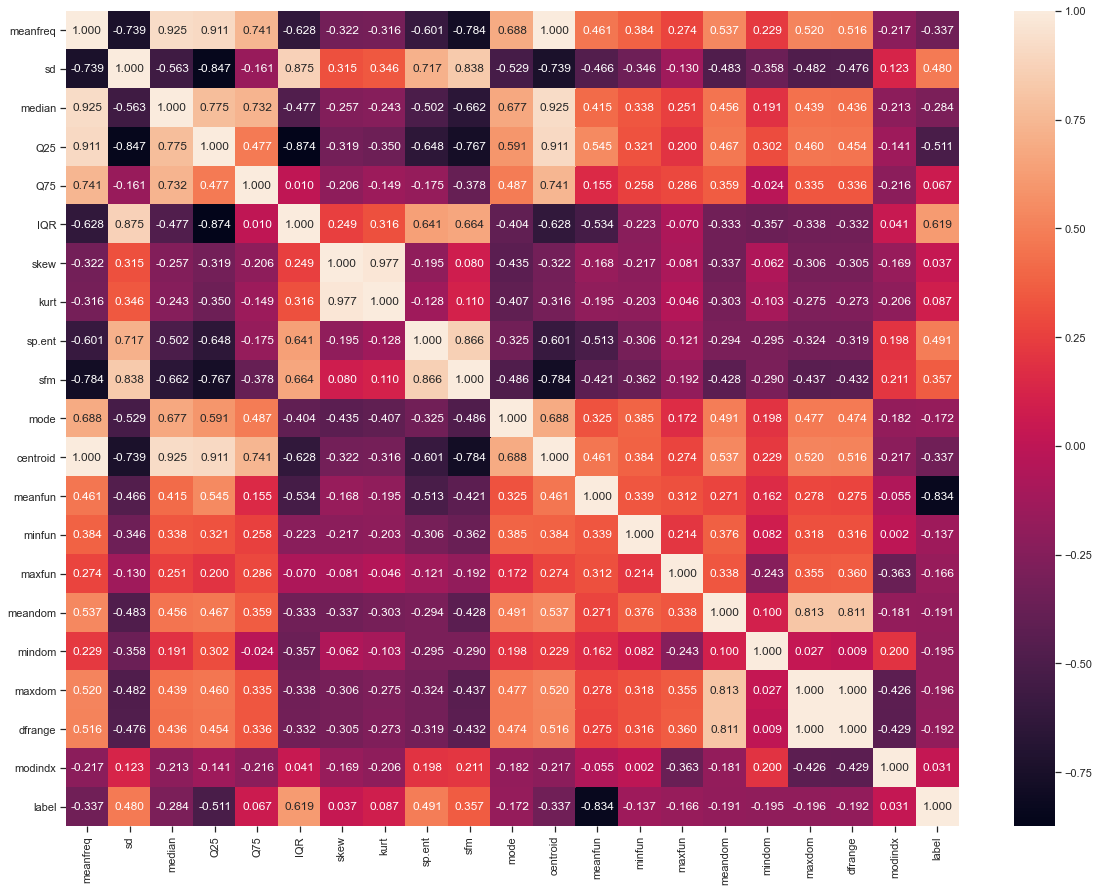

In [27]:
# Вывод значений в ячейках
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(data_clear.corr(), ax=ax, annot=True, fmt='.3f')

Мы можем сделать следующие выводы:
+ Label сильно коррелирует с meanfun, IQR, Q25. Эти признаки обязательно оставим для решения задачи классификации.
+ Полностью друг от друга зависят признаки meanfreq и centroid и median. median удалим, так как он слабо коррелирует с целевым. Аналогично с centroid.
+ По этой же причине избавимся от sd. Он сильно коррелирует с IQR и Q25. Избавимся также от kurt, так как он очень сильно коррелирует с skew.
+ Избавимся от sfm, так как он очень сильно коррелирует с sp.sent. Избавимся от meandom, dfrange, meanfreq.

In [28]:
data_clear_x = data_clear.drop('label', 1)
data_clear_y = data_clear['label']

In [29]:
data_clear_x.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx'],
      dtype='object')

In [30]:
cols_for_work = ['Q25', 'Q75', 'IQR', 'skew',
       'sp.ent', 'mode','meanfun', 'minfun', 'maxfun',
       'mindom', 'maxdom', 'modindx']

In [31]:
# Сразу сформируем набор данных, готовый к работе с моделями
data_X = data_clear_x[cols_for_work]
data_X

Q25       Q75       IQR      skew    sp.ent      mode   meanfun  \
0     0.060063  0.204956  0.254828  0.367853  0.635798  0.000000  0.157706   
1     0.077635  0.215683  0.246961  0.644279  0.630964  0.000000  0.287642   
2     0.034284  0.385912  0.457148  0.885255  0.442738  0.000000  0.236945   
3     0.389906  0.715802  0.407358  0.031549  0.923261  0.299565  0.183442   
4     0.317627  0.707515  0.474474  0.027742  0.958736  0.372362  0.279190   
...        ...       ...       ...       ...       ...       ...       ...   
3163  0.198513  0.686256  0.577704  0.046854  0.921665  0.717272  0.698762   
3164  0.171937  0.702595  0.621185  0.015961  0.912549  0.048868  0.732760   
3165  0.134329  0.786967  0.742124  0.050161  0.855587  0.028592  0.847759   
3166  0.175136  0.767804  0.681107  0.041908  0.870307  0.757865  0.641561   
3167  0.282629  0.901780  0.699289  0.045203  0.822610  0.956078  0.714235   

        minfun    maxfun    mindom    maxdom   modindx  
0     0.030501  0.981526  0.006452  0.000000  0.000000  
1     0.031140  0.834600  0.006452  0.002144  0.056449  
2     0.030264  0.954963  0.006452  0.000357  0.049885  
3     0.041287  0.834600  0.006452  0.025375  0.265043  
4     0.036829  0.929285  0.006452  0.250536  0.223380  
...        ...       ...       ...       ...       ...  
3163  0.380813  0.904450  0.006452  0.192280  0.173674  
3164  0.126776  0.981526  0.075269  0.167977  0.298053  
3165  0.153011  0.981526  0.006452  0.134024  0.208885  
3166  0.127158  0.834600  0.006452  0.164046  0.333559  
3167  0.270097  0.954963  0.006452  0.025018  0.375386  

[3168 rows x 12 columns]

<AxesSubplot:>

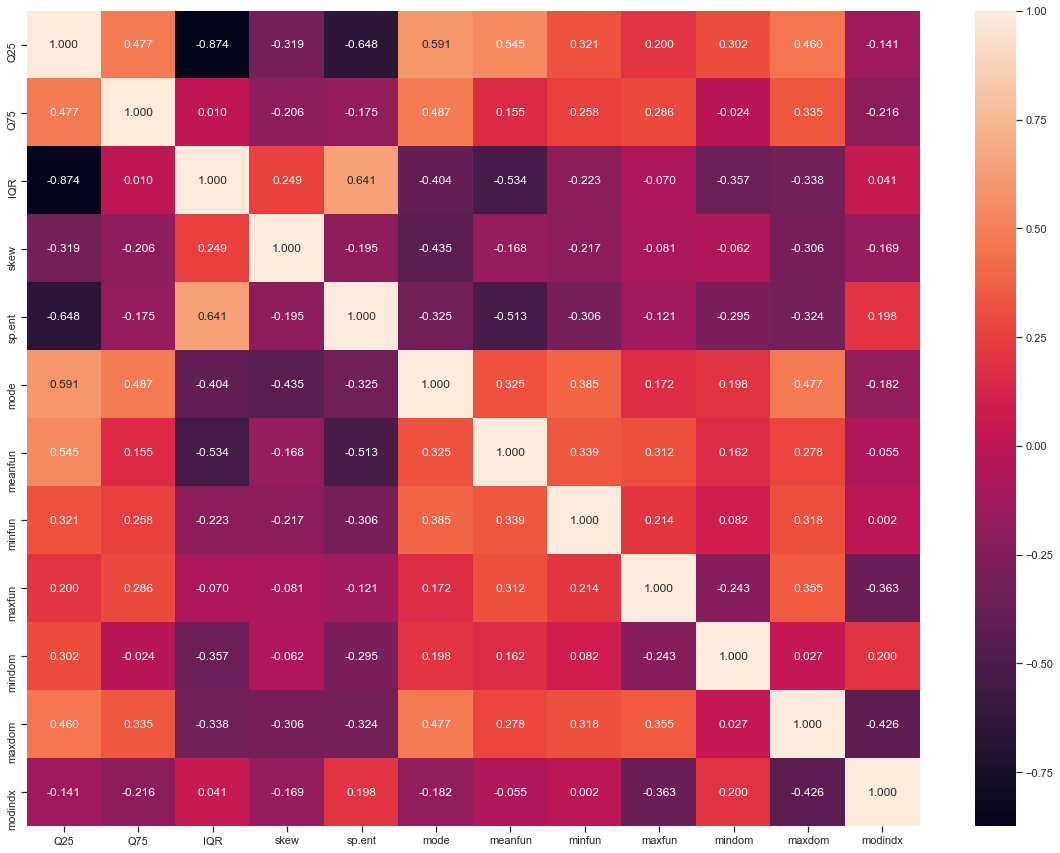

In [32]:
# Вывод значений в ячейках
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(data_X.corr(), ax=ax, annot=True, fmt='.3f')

In [33]:
data_Y = data_clear_y

## 4) Выбор метрик для последующей оценки качества моделей.

Так как решаем мы задачу классификации, то будем использовать такие метрики:

### 1) Матрица ошибок или Confusion Matrix
Это количество верно и ошибочно классифицированных данных, представленные в виде матрицы.
### 2) F-1 мера. 
Она объединяет в себе precision (Доля верно определенных положительных из всех определенных как положительные) и recall (Доля верно предсказанных положительных из всех действительно положительных).
### 3) ROC-кривая
В данном примере как раз решается задача бинарной классификации, так что это лучшее место использовать ROC-кривую.
### 4) Для сравнения моделей используем также precision и recall

Класс для сохранения метрик и дальнейшего сравнения

In [34]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()   

## 5) Выбор наиболее подходящих моделей для решения задачи классификации.

Будем использовать такие модели для решения задачи:
+ **Метод K ближайших соседей**
+ **Логистическая регрессия**
+ **Машина опорных векторов**
+ **Случайный лес**
+ **Градиентный бустинг**

## 6) Формирование обучающей и тестовой выборок на основе исходного набора данных.

In [35]:
# Разделим данные на обучающие и тестовые выборки
pol_X_train, pol_X_test, pol_y_train, pol_y_test = train_test_split(data_X, data_Y, test_size = 0.45, random_state = 1)

In [36]:
# Размер обучающей выборки
pol_X_train.shape, pol_y_train.shape

((1742, 12), (1742,))

In [37]:
# Размер тестовой выборки
pol_X_test.shape, pol_y_test.shape

((1426, 12), (1426,))

In [38]:
def class_proportions(array: np.ndarray) -> Dict[int, Tuple[int, float]]:
    """
    Вычисляет пропорции классов
    array - массив, содержащий метки классов
    """
    # Получение меток классов и количества меток каждого класса 
    labels, counts = np.unique(array, return_counts=True)
    # Превращаем количество меток в процент их встречаемости
    # делим количество меток каждого класса на общее количество меток
    counts_perc = counts/array.size
    # Теперь sum(counts_perc)==1.0
    # Создаем результирующий словарь,
    # ключом словаря явлется метка класса, 
    # а значением словаря процент встречаемости метки
    res = dict()
    for label, count2 in zip(labels, zip(counts, counts_perc)):
        res[label] = count2
    return res

def print_class_proportions(array: np.ndarray):
    """
    Вывод пропорций классов
    """
    proportions = class_proportions(array)
    if len(proportions)>0:
        print('Метка \t Количество \t Процент встречаемости')
    for i in proportions:
        val, val_perc = proportions[i]
        val_perc_100 = round(val_perc * 100, 2)
        print('{} \t {} \t \t {}%'.format(i, val, val_perc_100))

In [39]:
# В обучающей выборке
print_class_proportions(pol_y_train)

Метка 	 Количество 	 Процент встречаемости
0 	 878 	 	 50.4%
1 	 864 	 	 49.6%


In [40]:
# В тестовой выборке
print_class_proportions(pol_y_test)

Метка 	 Количество 	 Процент встречаемости
0 	 706 	 	 49.51%
1 	 720 	 	 50.49%


## 7) Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

In [41]:
# Модели
clas_models = {'KNN_5':KNeighborsClassifier(n_neighbors=5),
               'LogR': LogisticRegression(), 
               'SVC':SVC(probability=True),
               'RF':RandomForestClassifier(),
               'GB':GradientBoostingClassifier()}

In [42]:
# Сохранение метрик
clasMetricLogger = MetricLogger()

In [43]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, ax, pos_label=1, average='micro'):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    #plt.figure()
    lw = 2
    ax.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_xlim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")

In [44]:
def clas_train_model(model_name, model, clasMetricLogger):
    model.fit(pol_X_train, pol_y_train)
    # Предсказание значений
    Y_pred = model.predict(pol_X_test)
    # Предсказание вероятности класса "1" для roc auc
    Y_pred_proba_temp = model.predict_proba(pol_X_test)
    Y_pred_proba = Y_pred_proba_temp[:,1]
    
    precision = precision_score(pol_y_test.values, Y_pred)
    recall = recall_score(pol_y_test.values, Y_pred)
    f1 = f1_score(pol_y_test.values, Y_pred)
    roc_auc = roc_auc_score(pol_y_test.values, Y_pred_proba)
    
    clasMetricLogger.add('precision', model_name, precision)
    clasMetricLogger.add('recall', model_name, recall)
    clasMetricLogger.add('f1', model_name, f1)
    clasMetricLogger.add('roc_auc', model_name, roc_auc)

    fig, ax = plt.subplots(ncols=2, figsize=(10,5))
    #plot_roc_curve(model, pol_X_test, pol_y_test)    
    draw_roc_curve(pol_y_test.values, Y_pred_proba, ax[0])
    plot_confusion_matrix(model, pol_X_test, pol_y_test.values, ax=ax[1],
                      display_labels=['female','male'], 
                      cmap=plt.cm.Blues, normalize='true')
    fig.suptitle(model_name)
    plt.show()

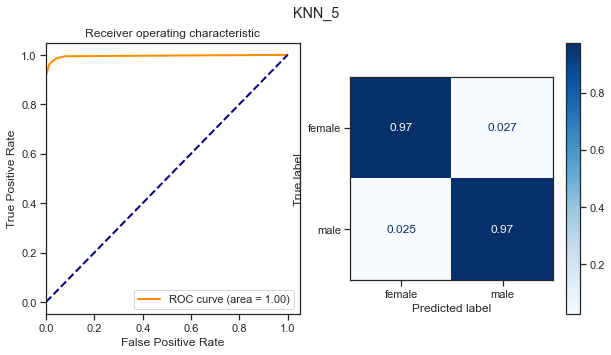

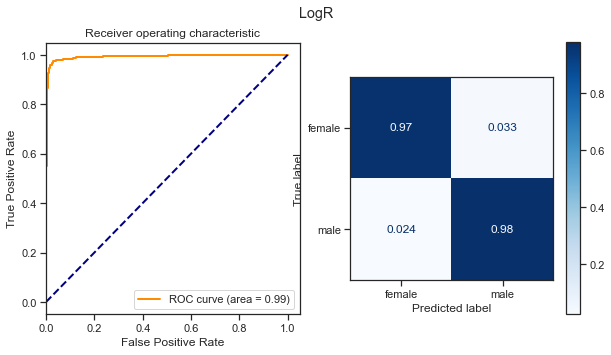

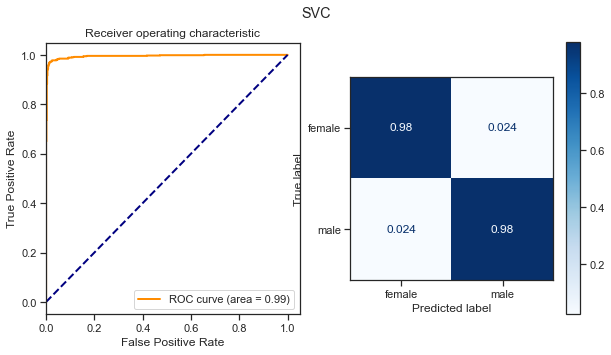

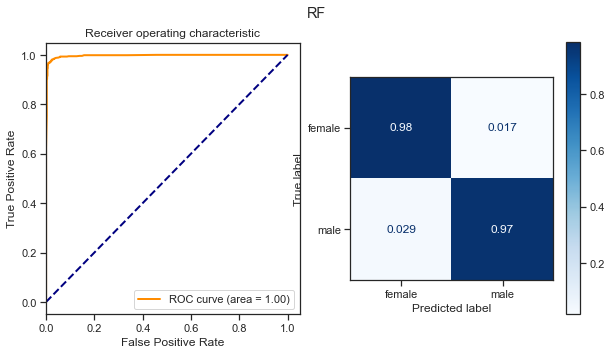

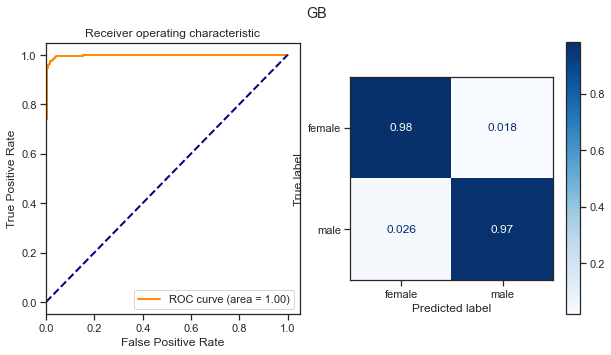

In [45]:
for model_name, model in clas_models.items():
    clas_train_model(model_name, model, clasMetricLogger)

## 8) Подбор гиперпараметров для выбранных моделей.

### 1) Для K ближайших соседей

In [46]:
distributions1 = dict(n_neighbors = [1, 5, 10, 15, 25, 50, 100, 200, 250, 300])

In [47]:
%%time
select1 = RandomizedSearchCV(KNeighborsClassifier(), distributions1, cv=5, scoring='roc_auc')
select1.fit(pol_X_train, pol_y_train)

Wall time: 1.08 s


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [1, 5, 10, 15, 25, 50,
                                                        100, 200, 250, 300]},
                   scoring='roc_auc')

In [48]:
select1.best_estimator_

KNeighborsClassifier(n_neighbors=15)

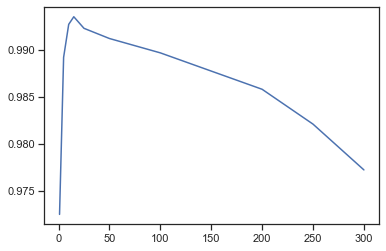

In [49]:
plt.plot([1, 5, 10, 15, 25, 50, 100, 200, 250, 300], select1.cv_results_['mean_test_score'])

### 2) Для логистической регрессии

In [50]:
from scipy.stats import uniform

In [51]:
distributions2 = dict(C = uniform(loc=0, scale=4),
                     penalty=['l2', 'l1'])

In [52]:
%%time
select2 = RandomizedSearchCV(LogisticRegression(max_iter=200, solver='liblinear', random_state=1), distributions2, cv=5, scoring='roc_auc')
select2.fit(pol_X_train, pol_y_train)

Wall time: 1.62 s


RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(max_iter=200, random_state=1,
                                                solver='liblinear'),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002EAE0C381C0>,
                                        'penalty': ['l2', 'l1']},
                   scoring='roc_auc')

In [53]:
select2.best_estimator_

LogisticRegression(C=3.0186445014397485, max_iter=200, random_state=1,
                   solver='liblinear')

In [54]:
select2.best_score_

0.9920326028320382

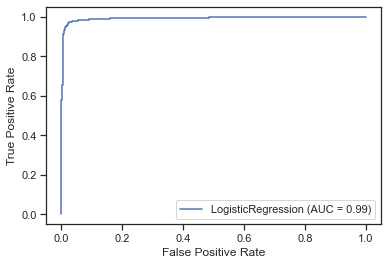

In [55]:
plot_roc_curve(select2.best_estimator_, pol_X_test, pol_y_test)

### 3) Для SVM 

In [56]:
distributions3 = dict(C = uniform(loc = 0, scale = 4),
                      kernel = ['linear', 'rbf', 'poly'],
                      degree = [3, 4, 5, 6],
                      gamma = uniform(loc = 0, scale = 1))

In [57]:
%%time
select3 = RandomizedSearchCV(SVC(max_iter=1000, random_state=2), distributions3, cv=5, scoring='roc_auc')
select3.fit(pol_X_train, pol_y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solv

RandomizedSearchCV(cv=5, estimator=SVC(max_iter=1000, random_state=2),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002EAE13822B0>,
                                        'degree': [3, 4, 5, 6],
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002EAE13DA910>,
                                        'kernel': ['linear', 'rbf', 'poly']},
                   scoring='roc_auc')

In [58]:
select3.best_estimator_

SVC(C=1.4284343756829472, degree=5, gamma=0.23934538806088057, max_iter=1000,
    random_state=2)

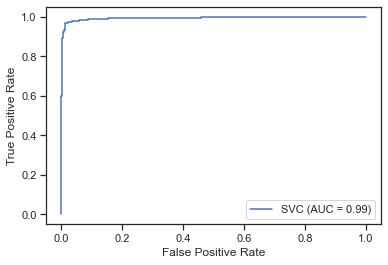

In [59]:
plot_roc_curve(select3.best_estimator_, pol_X_test, pol_y_test)

### 4) Для случайного леса

In [60]:
distibutions4 = dict(n_estimators = [10, 25, 45, 50, 100, 120, 130],
                    max_depth = [2, 3, 4, 5, 6, 7],
                    criterion = ['gini', 'entropy'])

In [61]:
%%time
select4 = RandomizedSearchCV(RandomForestClassifier(random_state=1), distibutions4, cv=5, scoring='roc_auc')
select4.fit(pol_X_train, pol_y_train)

Wall time: 3.85 s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'n_estimators': [10, 25, 45, 50, 100,
                                                         120, 130]},
                   scoring='roc_auc')

In [62]:
select4.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=45,
                       random_state=1)

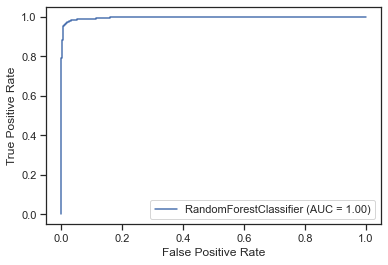

In [63]:
plot_roc_curve(select4.best_estimator_, pol_X_test, pol_y_test)

In [64]:
list(zip(data_X.columns.values, select4.best_estimator_.feature_importances_))

[('Q25', 0.15914108044718814),
 ('Q75', 0.015421466075826977),
 ('IQR', 0.16230624388549178),
 ('skew', 0.016802720149755528),
 ('sp.ent', 0.09886737339970184),
 ('mode', 0.030278464720443408),
 ('meanfun', 0.44769301172880516),
 ('minfun', 0.013459174827299152),
 ('maxfun', 0.011743353520594454),
 ('mindom', 0.011740274798149335),
 ('maxdom', 0.017218152215303387),
 ('modindx', 0.01532868423144091)]

In [65]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(10,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

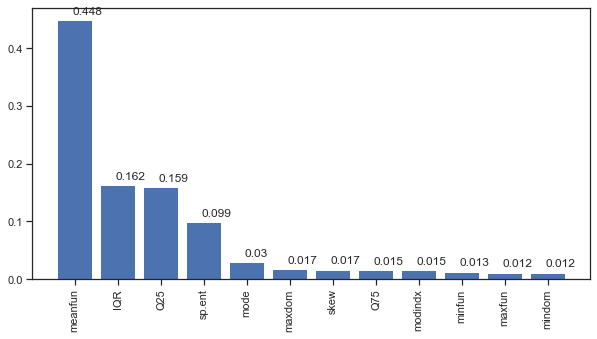

In [66]:
# Важность признаков
model_forest_optimal_fl, model_forest_optimal_fd = draw_feature_importances(select4.best_estimator_, data_X)

In [67]:
test_x = data_X[['meanfun', 'IQR']]
test_x

meanfun       IQR
0     0.157706  0.254828
1     0.287642  0.246961
2     0.236945  0.457148
3     0.183442  0.407358
4     0.279190  0.474474
...        ...       ...
3163  0.698762  0.577704
3164  0.732760  0.621185
3165  0.847759  0.742124
3166  0.641561  0.681107
3167  0.714235  0.699289

[3168 rows x 2 columns]

In [68]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #Можно проверить все ли метки классов предсказываются
    #print(np.unique(Z))
    out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_cl(clf):
    title = clf.__repr__
    clf.fit(test_x, data_Y)
    fig, ax = plt.subplots(figsize=(5,5))
    X0, X1 = test_x.iloc[:, 0], test_x.iloc[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=data_Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Alcohol')
    ax.set_ylabel('Sulphates')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    plt.show()

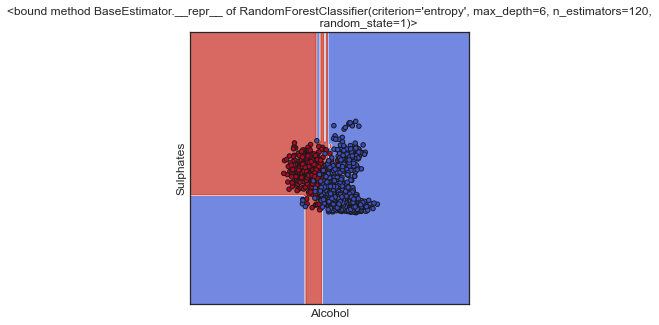

In [69]:
# Взяли лишь два самых важных признака: среднее значение основной частоты, измеренное по акустическому сигналу и межквантильный диапазон
plot_cl(RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=120,
                       random_state=1))

### 5) Для градиентного бустинга

In [70]:
distibutions5 = dict(n_estimators = [10, 25, 45, 50, 100, 120, 130],
                    max_depth = [2, 3, 4, 5, 6, 7])

In [71]:
%%time
select5 = RandomizedSearchCV(GradientBoostingClassifier(random_state    =0), distibutions5, cv=5, scoring='roc_auc')
select5.fit(pol_X_train, pol_y_train)

Wall time: 13.5 s


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7],
                                        'n_estimators': [10, 25, 45, 50, 100,
                                                         120, 130]},
                   scoring='roc_auc')

In [72]:
select5.best_estimator_

GradientBoostingClassifier(max_depth=4, n_estimators=120, random_state=0)

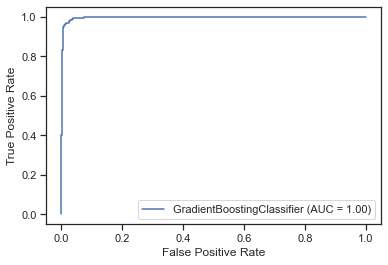

In [73]:
plot_roc_curve(select5.best_estimator_, pol_X_test, pol_y_test)

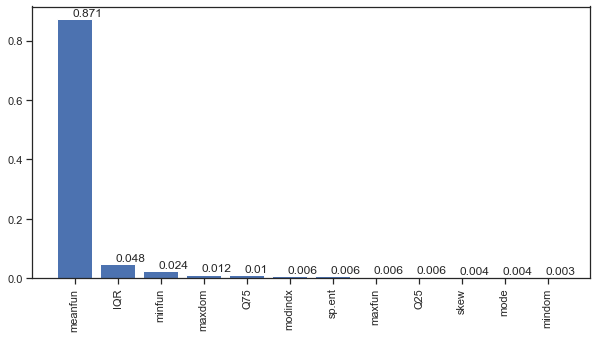

In [74]:
# Важность признаков
model_forest_optimal_fl2, model_forest_optimal_fd2 = draw_feature_importances(select5.best_estimator_, data_X)

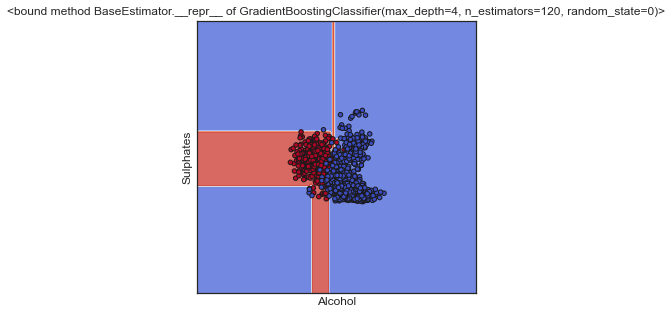

In [75]:
# Взяли лишь два самых важных признака: среднее значение основной частоты, измеренное по акустическому сигналу и межквантильный диапазон
plot_cl(GradientBoostingClassifier(max_depth=4, n_estimators=120, random_state=0))

## 9) Повторение 7 пункта на оптимальных моделях. Сравнения качества.

In [ ]:
# Модели
#clas_models = {'KNN_5':KNeighborsClassifier(n_neighbors=5),
#               'LogR': LogisticRegression(), 
#               'SVC':SVC(probability=True),
#               'RF':RandomForestClassifier(),
#               'GB':GradientBoostingClassifier()}

In [77]:
choose_knn = {'KNN_5':KNeighborsClassifier(n_neighbors=5), 
                    'KNN_optimal':select1.best_estimator_}

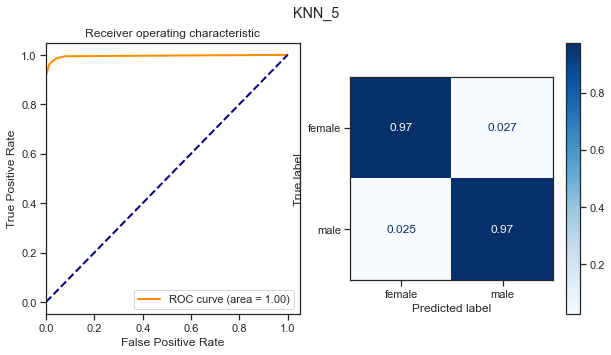

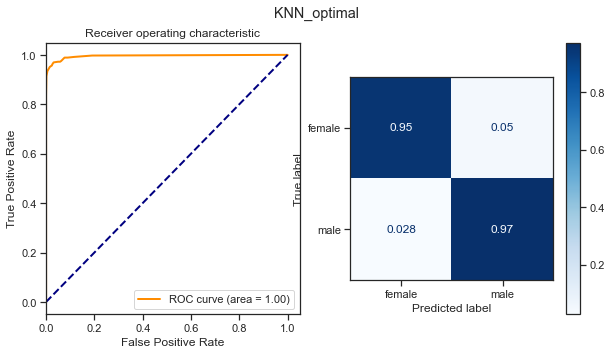

In [78]:
for model_name, model in choose_knn.items():
    clas_train_model(model_name, model, clasMetricLogger)

In [79]:
choose_logr = {'LogR': LogisticRegression(), 
                    'LogR_optimal':select2.best_estimator_}

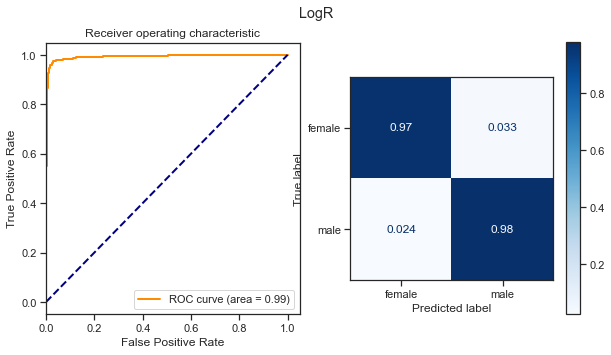

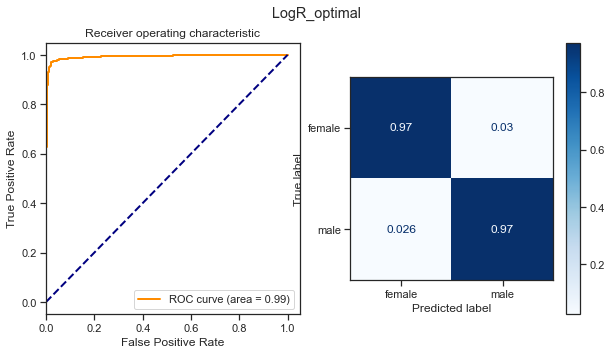

In [80]:
for model_name, model in choose_logr.items():
    clas_train_model(model_name, model, clasMetricLogger)

In [84]:
choose_svc = {'SVC':SVC(probability=True),
              'SVC_optimal':SVC(C=1.4284343756829472, degree=5, gamma=0.23934538806088057, max_iter=1000,
    random_state=2, probability=True)}

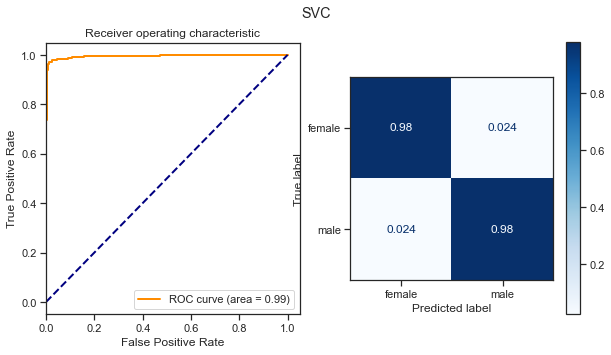

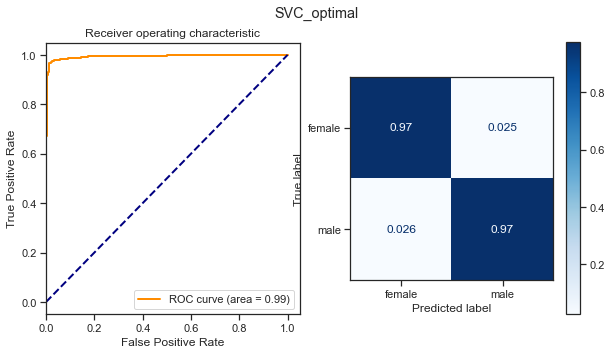

In [85]:
for model_name, model in choose_svc.items():
    clas_train_model(model_name, model, clasMetricLogger)

In [86]:
choose_rf = {'RF':RandomForestClassifier(),
              'RF_optimal':select4.best_estimator_}

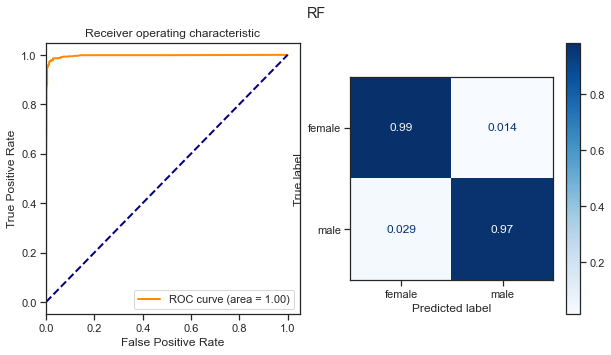

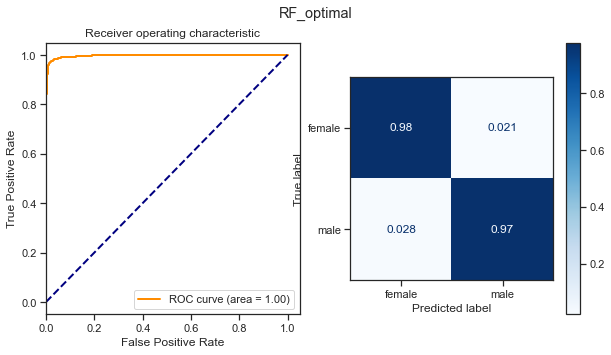

In [87]:
for model_name, model in choose_rf.items():
    clas_train_model(model_name, model, clasMetricLogger)

In [88]:
choose_gb = {'GB':GradientBoostingClassifier(),
              'GB_optimal':select5.best_estimator_}

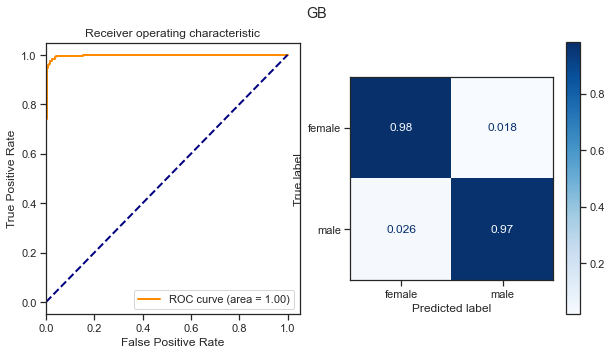

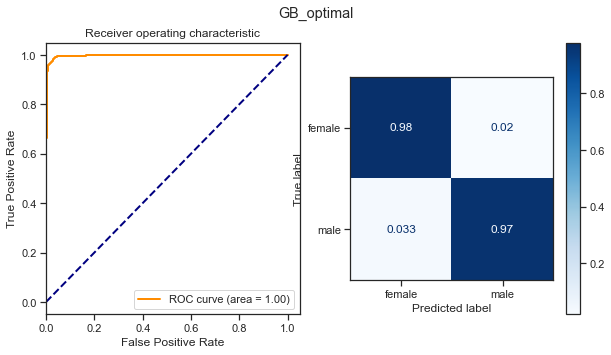

In [89]:
for model_name, model in choose_gb.items():
    clas_train_model(model_name, model, clasMetricLogger)

## 10) Формирование выводов о качестве построенных моделей на основе выбранных метрик.

In [91]:
# Метрики качества модели
clas_metrics = clasMetricLogger.df['metric'].unique()
clas_metrics

array(['precision', 'recall', 'f1', 'roc_auc'], dtype=object)

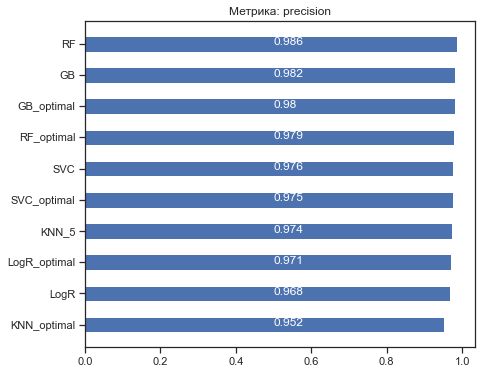

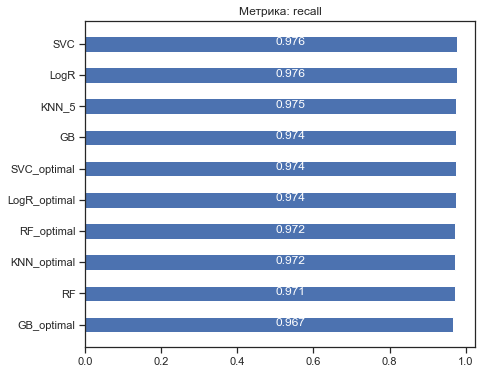

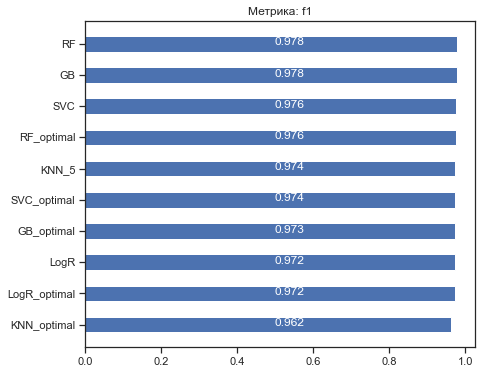

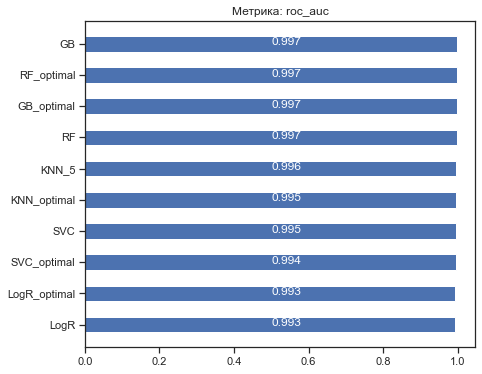

In [92]:
# Построим графики метрик качества модели
for metric in clas_metrics:
    clasMetricLogger.plot('Метрика: ' + metric, metric, figsize=(7, 6))

In [93]:
from sklearn.model_selection import learning_curve

In [94]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes = np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                     train_scores_mean + train_scores_std, alpha = 0.3, color = 'r')
    
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha = 0.1, color = 'g')

    plt.plot(train_sizes, train_scores_mean, 'o-', color = 'r',
             label = "Training scores")

    plt.plot(train_sizes, test_scores_mean, 'o-', color = 'g', label = "Cross-validation score")

    plt.legend(loc = "best")
    return plt

In [104]:
# Модели
#clas_models = {'KNN_5':KNeighborsClassifier(n_neighbors=5),
#               'LogR': LogisticRegression(), 
#               'SVC':SVC(probability=True),
#               'RF':RandomForestClassifier(),
#               'GB':GradientBoostingClassifier()}

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

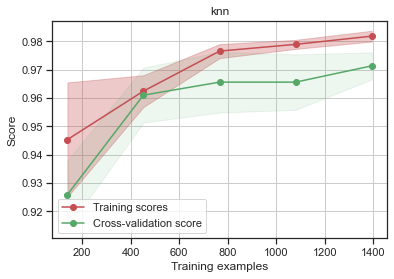

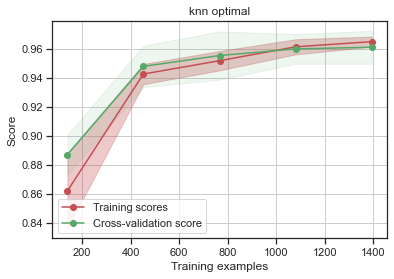

In [105]:
plot_learning_curve(KNeighborsClassifier(n_neighbors=5), 'knn',
                    pol_X_train, pol_y_train, cv=5)
plot_learning_curve(select1.best_estimator_, 'knn optimal',
                    pol_X_train, pol_y_train, cv=5)

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

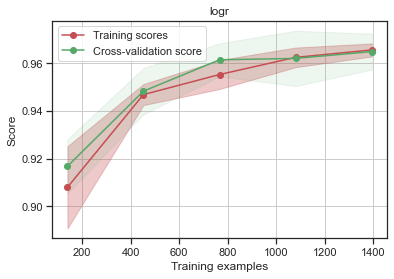

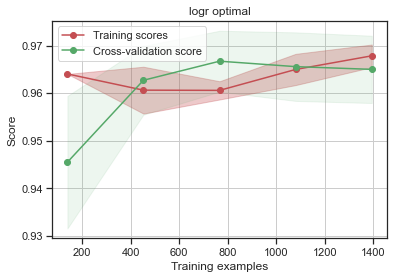

In [106]:
plot_learning_curve(LogisticRegression(), 'logr',
                    pol_X_train, pol_y_train, cv=5)
plot_learning_curve(select2.best_estimator_, 'logr optimal',
                    pol_X_train, pol_y_train, cv=5)

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

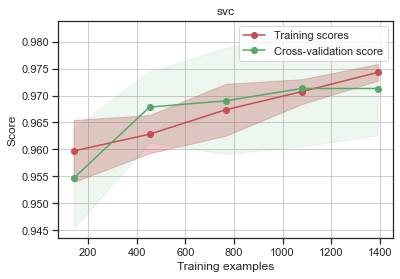

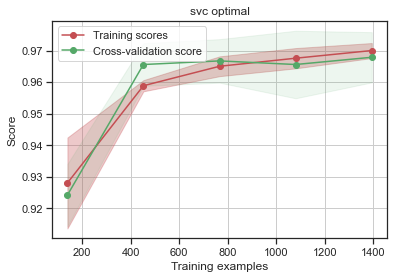

In [107]:
plot_learning_curve(SVC(probability=True), 'svc',
                    pol_X_train, pol_y_train, cv=5)
plot_learning_curve(select3.best_estimator_, 'svc optimal',
                    pol_X_train, pol_y_train, cv=5)

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

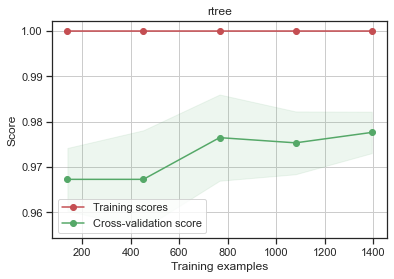

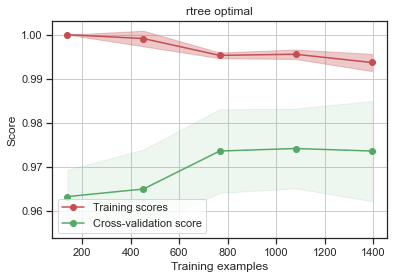

In [108]:
plot_learning_curve(RandomForestClassifier(), 'rtree',
                    pol_X_train, pol_y_train, cv=5)
plot_learning_curve(select4.best_estimator_, 'rtree optimal',
                    pol_X_train, pol_y_train, cv=5)

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

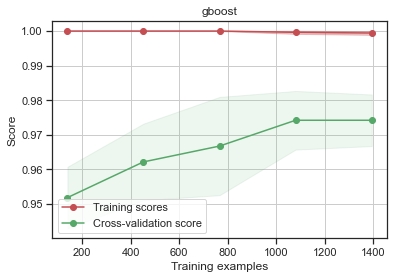

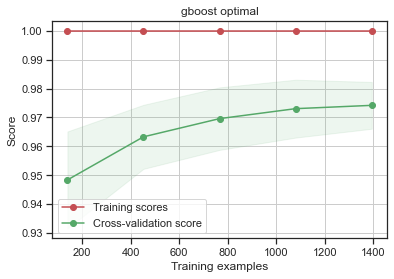

In [109]:
plot_learning_curve(GradientBoostingClassifier(), 'gboost',
                    pol_X_train, pol_y_train, cv=5)
plot_learning_curve(select5.best_estimator_, 'gboost optimal',
                    pol_X_train, pol_y_train, cv=5)

## Вывод
### По метрике precision:
Мы можем увидеть, что ансамблевые модели отработали лучше всего, причем до подбора гипепараметров. После подбора лучше всего сработали опять же ансмблевые модели. Из неансамблевых лучше всего сработала машина опорных векторов, а хуже всего - метод ближайших соседей с подобранными гиперпараметрами.

### По метрике recall:
Мы видим, что лучше всего сработала машина опорных векторов и логистическая регрессия. Анасамблевые модели же сработали хуже остальных.

### По f1:
Снова видим превосходство ансамблевых моделей, и снова видим, что хуже всего сработал метод ближайших соседей.

### По roc-кривой:
Опять же видим, что бустинг и случайный лес работает лучше, чем неансамблевые модели, а линейная модель окахалась хуже всего.
### Итог
Если смотреть по кривой обучения и кросс-валидации, то заметим, что большниство моделей после подбора гиперпараметров отработали хуже baseline. Улучшился заметно градиентый бустинг, поэтому можно сказать, что обобщая все метрики, на данном наборе данных метод градиентного бустинга работает лучше всего. Далее можно поставить случайный лес. Из оставшихся менее всего потерял метод логистической регрессииЮ а более плохо сработал метод ближайших соседей.
